In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

import functions as myfunc

In [2]:
nodes = np.loadtxt("Lösung/Netz1D_p.dat")
number_of_nodes = len(nodes)
element_indices = np.loadtxt("Lösung/Elemente1D_t.dat")

coefficients_matrix = np.loadtxt("Lösung/Netz1D_Matrix_K.dat")
rhs_matrix = np.loadtxt("Lösung/Netz1D_Vector_D.dat").reshape((number_of_nodes, 1))

def alpha(x):
    """
    Piecewise function for alpha(x):
    - 3 in [1.5, 2.7]
    - x^2 elsewhere
    """
    x = np.asarray(x)
    return np.where((1.5 <= x) & (x <= 2.7), 3.0, np.square(x))

def beta(x):
    """
    Piecewise function for beta(x):
    - x / (x+1) in [1, 2]
    - x^2 elsewhere
    """
    x = np.asarray(x)
    return np.where((1 <= x) & (x <= 2), x / (x + 1), np.square(x))

def rhs(x):
    """
    Right-hand side f(x):
    - x in [2, 4]
    - x + 1 elsewhere
    """
    x = np.asarray(x)
    return np.where((2 <= x) & (x <= 4), x, x + 1)

def gamma(x):
    """
    Robin issue function gamma(x).
    Only for the lower bound!
    """
    return 0

In [3]:
DOMAIN_BOUNDARY = {
    "Lower Bound": 1,
    "Upper Bound": 4
}
BOUNDARY_CONDITION = {
    "Lower Bound": {
        "x": DOMAIN_BOUNDARY["Lower Bound"],
        "x Index": np.where(np.isclose(nodes, DOMAIN_BOUNDARY["Lower Bound"]))[0][0],
        "Gamma": gamma(DOMAIN_BOUNDARY["Lower Bound"]),
        "Rho": -3
    },
    "Upper Bound": {
        "x": DOMAIN_BOUNDARY["Upper Bound"],
        "x Index": np.where(np.isclose(nodes, DOMAIN_BOUNDARY["Upper Bound"]))[0][0],
        "Phi": 2
    }
}

In [4]:
coefficients_matrix, rhs_matrix = myfunc.add_robin_issue_values(coefficients_matrix, rhs_matrix, BOUNDARY_CONDITION)

coefficients_matrix, rhs_matrix = myfunc.reduce_matrices(coefficients_matrix, rhs_matrix, BOUNDARY_CONDITION)

In [5]:
reduced_solution = myfunc.solve_leq(coefficients_matrix, rhs_matrix)

solution = myfunc.insert_boundary_values(reduced_solution, number_of_nodes, BOUNDARY_CONDITION)
print(solution)

[[ 0.71948948]
 [ 0.18606971]
 [ 0.82355173]
 [ 0.80185027]
 [ 1.15456126]
 [-0.11555788]
 [ 0.79459452]
 [ 0.71197855]
 [ 0.63032123]
 [ 0.17162204]
 [ 0.15685686]
 [ 1.62719021]
 [-0.25068019]
 [ 0.5816598 ]
 [ 0.72028858]
 [ 0.55719765]
 [ 1.03343774]
 [ 0.64878998]
 [ 0.81555585]
 [ 1.55248905]
 [ 0.95181106]
 [ 1.83688226]
 [-0.24266896]
 [ 1.53952198]
 [ 1.33058876]
 [ 0.33717618]
 [ 0.57527844]
 [ 0.82192981]
 [ 0.94921945]
 [ 1.48946819]
 [ 1.23530377]
 [ 0.32601676]
 [ 0.59103736]
 [ 0.77813777]
 [ 0.66711639]
 [ 0.60466401]
 [-0.06122646]
 [ 0.36230529]
 [ 1.26979654]
 [ 0.30687875]
 [ 0.72108057]
 [ 0.62895203]
 [ 1.40853867]
 [ 0.88017563]
 [ 0.80935863]
 [ 0.77293142]
 [ 1.9250202 ]
 [ 1.60623806]
 [ 0.32224359]
 [ 1.09575892]
 [ 0.18128863]
 [ 0.61775986]
 [ 0.27480016]
 [-0.25875432]
 [ 1.85402955]
 [ 0.2364459 ]
 [ 0.61345378]
 [ 0.50582954]
 [ 0.64364691]
 [ 0.7742206 ]
 [ 1.13394227]
 [ 1.36588491]
 [ 0.59867304]
 [ 1.24798661]
 [ 0.71023173]
 [ 0.89273482]
 [ 0.06680

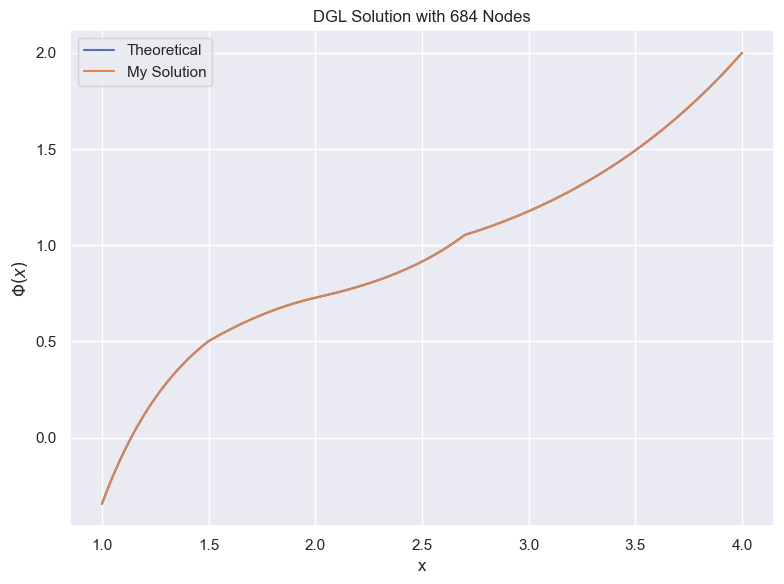

In [6]:
theoretical = np.loadtxt("Lösung/Netz1D_LoesungC.dat")
theoretical_df = myfunc.create_solution_df(nodes, theoretical)

solution_df = myfunc.create_solution_df(nodes, solution)


plt.figure(figsize=(8, 6))
plt.plot(theoretical_df["x"], theoretical_df["Phi"], label="Theoretical")
plt.plot(solution_df["x"], solution_df["Phi"], label="My Solution")

plt.xlabel("x")
plt.ylabel(r"$\Phi (x)$")
plt.title(f"DGL Solution with {number_of_nodes} Nodes")
plt.legend()

plt.tight_layout()
plt.show()

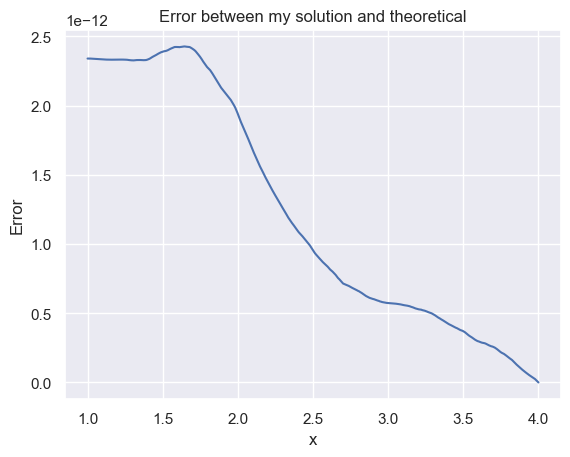

In [7]:
plt.plot(solution_df["x"], solution_df["Phi"]-theoretical_df["Phi"])
plt.xlabel("x")
plt.ylabel("Error")
plt.title("Error between my solution and theoretical")

plt.show()